# Crude Oil Prediction
<hr>

In [851]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression


In [852]:
# Read data set
df = pd.read_csv("crude-oil-price.csv")
df.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62


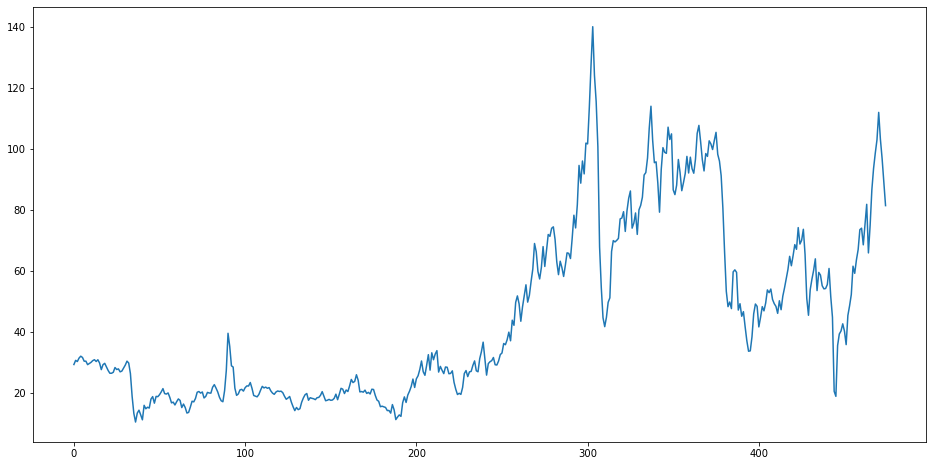

In [853]:
# Plotting
plt.figure(figsize=(16,8))
plt.plot(df["price"], label="Crude oil price")

In [854]:
# Format datetime
df['date'] = pd.to_datetime(df['date'])

Text(0, 0.5, 'price')

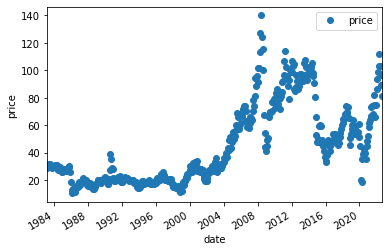

In [855]:
# Scatter plot of price
df.plot(x='date', y='price', style='o')
plt.ylabel('price')

In [856]:
# Define our explanatory variables
# The variables we will be using at this stage, are the moving averages for the past three and nine days
df['MA3'] = df['price'].shift(1).rolling(window=3).mean()
df['MA9']= df['price'].shift(1).rolling(window=9).mean()

In [857]:
# Dropping the NaN values
df = df.dropna()

# Initialising X and assigning the two feature variables
X = df[['MA3','MA9']]
X.head()

,MA3,MA9
9,29.986667,30.564444
10,29.733333,30.601111
11,29.603333,30.528889
12,30.043333,30.562222
13,30.460000,30.503333


In [858]:
# Setting-up the dependent variable
y = df['price']
y.head()

9     29.60
10    29.98
11    30.55
12    30.85
13    30.26
Name: price, dtype: float64

In [859]:
# Setting the training set to 70% of the data
training = 0.7
t = int(training*len(df))

# Training dataset
X_train = X[t:]
y_train = y[t:]

# Testing dataset
X_test = X[:t]
y_test = y[:t]

In [860]:
# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,y_train)

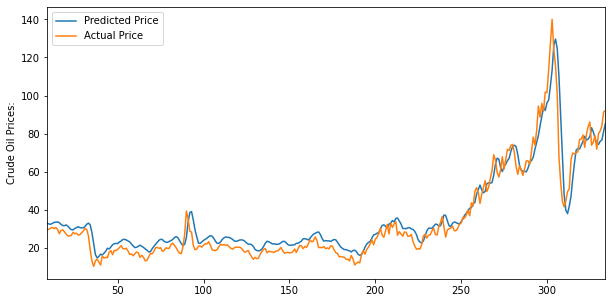

In [861]:
# Plotting our predicted price and actual price
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices:")
plt.show()